# <font color = 'DarkMagenta' > Clustering

In this excerise, we are trying to cluster IRIS Dataset.  

For this task, we are going to use four major clustering algorithms : Hierarchical, EM, DBSCAN, and Kmeans.

A set of hyperparameters and optioned are pre-defined to make unique clustering algorithms for our task. 

<hr> 
    
Everything required for this exercise is available at : 
    
    
   
***GitHub***  : <a href = "" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "" > Homework-1 google drive </a>

# <font color = 'DarkMagenta' > Import Libraries

<hr>


These libraries are essential to our code so please make sure that all of them are installed or 
<code> pip install </code> them.

- numpy, random ,and pandas are used for primal data operation


- matplotlib and seaborn are used for data visualization


- sklearn is the base of clustering algorithms
    

- mplot3d is to plot 3D data
    
    
- PCA is Principal Component Analysis and is used to help plot our data since IRIS features are in 4D space.



In [36]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA


from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn import metrics

## <font color ='DarkMagenta'> Hyperparameter/Options Assignment

In this section we assign hyperparameters and options for different algorithms. 

- n is the number of samples that we are going to generate


- n_clusters is the number of clusters we are willing to achieve


- affinity and linkage are both Hierarchical algorithm options

    - affinity can be 'l1' , 'l2' , 'euclidean' , 'manhattan' , 'cosine' ,or 'precomputed'
    
    - linkage  can be 'ward', 'complete' , 'single' ,or 'average'
    
- eps and min_samples are both dbscan hyperparameters.
    
    
- colors are a list of randomly generated colors for each clusters
    
    - c function, make use of colors to assign a color to each label in the clustering label list.
        if in dbscan, a label is -1, then the color is 'red'
    
    
**Since colors are randomly generated, sometimes it can generate very similar colors which might make it hard to distinguish the clusters; Therefore, re-run this section again to generate new colors**

In [7]:
# Number of Clusters
n_clusters = 3

# Hierarchical metric(affinity) and linkage

affinity = 'l1'
linkage  = 'complete' 


# DBSCAN eps and min point
eps = 0.5
min_samples = 8

# Colors

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(150)]
def c(labels):
    _c = []
    for label in labels:
        if label != -1:
            _c.append(colors[label])
        else:
            _c.append('red')
    return _c

# <font color = 'DarkMagenta'> Import Data

<hr>
    
sklearn dataset has the IRIS data, therefore there is no need to download it separately. IRIS dataset has 4 features and one target, which is the type of the flower. Since labels are know, we can use them to evaluate our clustering algorithms. 
    
We can also create new dataframes based on our dataset.
    
    
- X/data is the features
    
    
- Y/target is the target
    
    
- target_names is the dictionary to map each label to its flower type.
    
    
- dataframe is the IRIS dataset (features, target)

In [8]:
from sklearn import datasets

# Dataset

iris = datasets.load_iris()

# Data

data = iris.data
X =pd.DataFrame(data, columns=['sepal length','sepal width','petal length', 'petal width' ]) 


# Targets

target = iris.target
target_names = iris.target_names

Y = pd.DataFrame({'target' : target})
# Dataframe

dataframe = X.join(Y)


## <font color = 'DarkMagenta'> IRIS dataset
    
dataframe is a good explanation of the IRIS dataset.

In [9]:
print(f'IRIS has {dataframe.shape[0]} samples')
dataframe.head()

IRIS has 150 samples


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# <font color = 'DarkMagenta'> Visualize Data
    
<hr>
    
To Visualize the data, we have 3 options :
    
1. Use two components and plot 2D: In this case we are using PCA with number of components set to 2, and the result is very similar to the approach that is used in the book.
    
    
2. Use three components and plot 3D: In this case we are using PCA with number of components set to 3, and the result can be shown using 'mplot3d' withing matplotlib.
    
    
3. Use pariplot in seaborn. Pairplot is the pairwise relationships in a dataset 
    
    more information on pairpolot at : <a href ="https://seaborn.pydata.org/generated/seaborn.pairplot.html" > seaborn.pairplot </a>

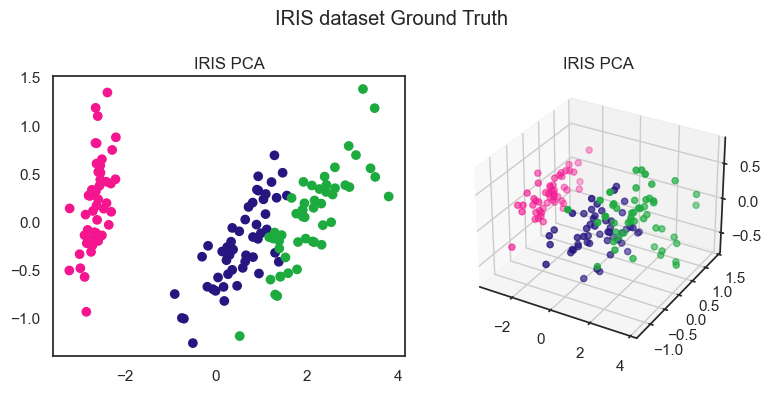

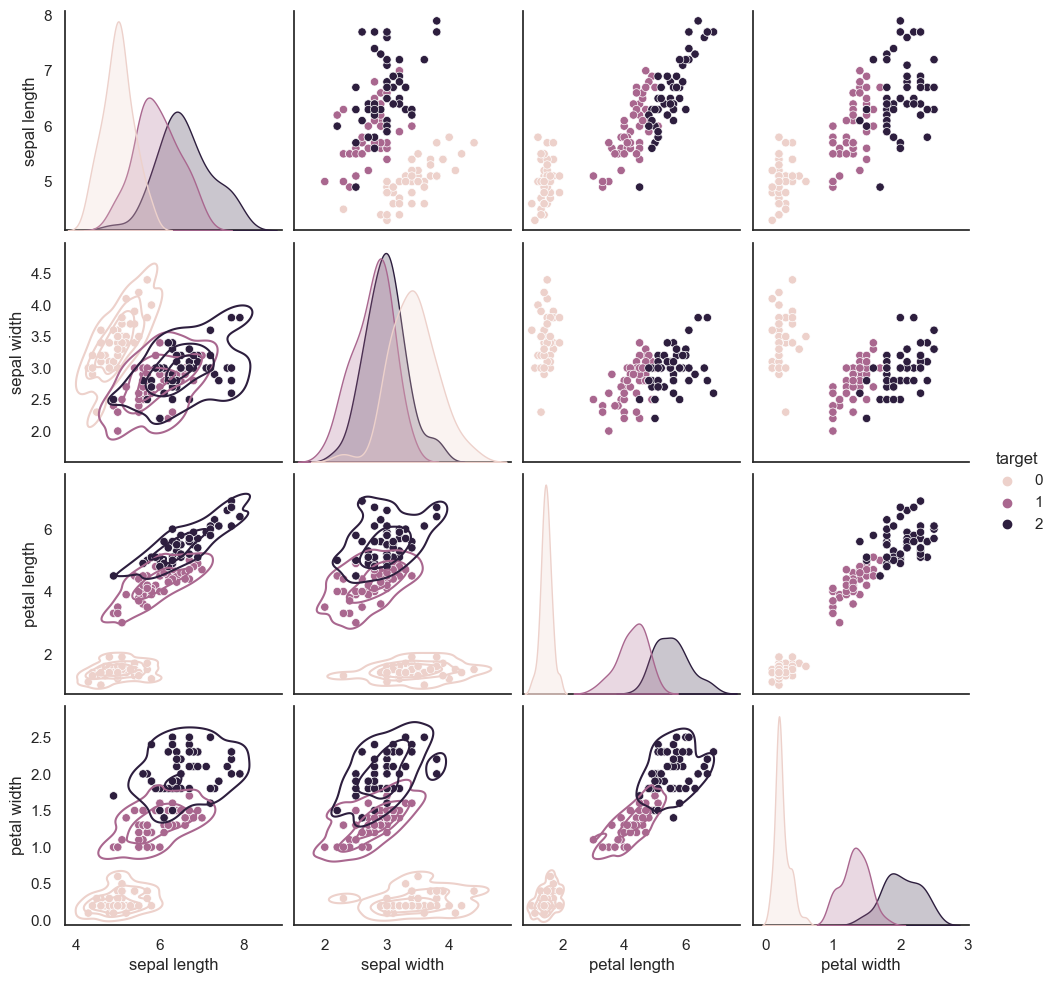

In [23]:
sns.set_theme(style='white', palette='bright')

# Principal Component Analysis --> 2
pca_2  = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X)

# Principal Component Analysis --> 3
pca_3 = PCA(n_components=3)
X_pca3 = pca_3.fit_transform(X)

fig = plt.figure(figsize = (8,4))

ax = fig.add_subplot(1,2,1)
ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=c(target))
ax.set_title('IRIS PCA')

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=c(target))
ax.set_title('IRIS PCA')

fig.suptitle('IRIS dataset Ground Truth')
fig.tight_layout()
plt.show()

# sns pairplot
# Might take a while to run

g = sns.pairplot(dataframe, hue='target')
g.map_lower(sns.kdeplot, levels=4, color=".5")
plt.show()

# <font color = 'DarkMagenta'> Hierarchical Clustering (Complete Link - L1)

<hr>

    
Using sklearn AgglomerativeClustering algorithm, we can perform hierarchical clustering on our dataset. We are using 'l1' hierarchical clustering with 'complete' linkage method.

In [25]:
# Create the model

clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)

# Fit the model on dataset

clustering.fit(data)

# Clustering labels

Hierarchical_labels = clustering.labels_


## <font color = 'DarkMagenta'> Visualizing the Results and lables


The result of hierarchical clustering can be acquired  using <code>.labels_</code> or other methods.

These labels are then assigned a color and visualized in a scatter plot using matplotlib.

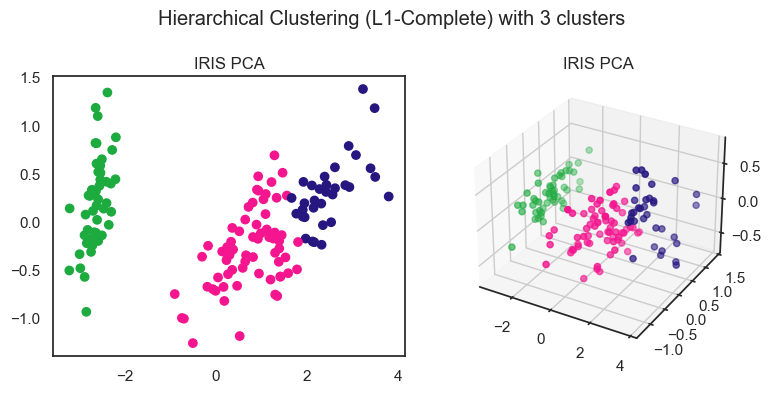

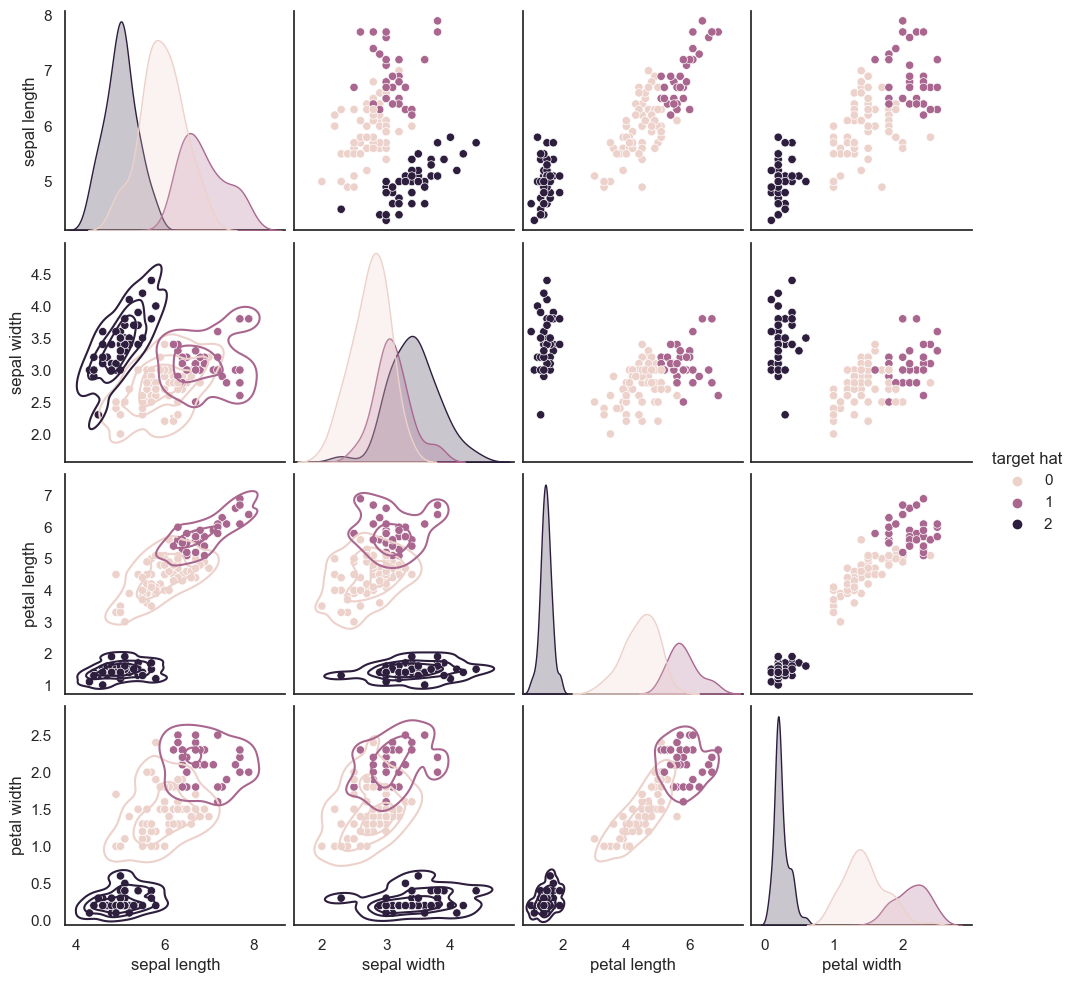

In [26]:
# Clustering Result

fig = plt.figure(figsize = (8,4))

ax = fig.add_subplot(1,2,1)
ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=c(Hierarchical_labels))
ax.set_title('IRIS PCA')

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=c(Hierarchical_labels))
ax.set_title('IRIS PCA')

fig.suptitle(f'Hierarchical Clustering (L1-Complete) with {n_clusters} clusters')
fig.tight_layout()
plt.show()

# sns pairplot
# Might take a while to run

dataframe_val = dataframe.drop(columns=['target'])
dataframe_val = dataframe_val.join(pd.DataFrame({'target hat' : Hierarchical_labels}))

g = sns.pairplot(dataframe_val, hue='target hat')
g.map_lower(sns.kdeplot, levels=4, color=".5")
plt.show()

# <font color = 'DarkMagenta'> Expected Maximum Clustering

<hr>

Using sklearn GaussianMixture algorithm, we can perform EM clustering on our dataset. 

In [27]:
# Create the model

clustering = GaussianMixture(n_components= n_clusters)

# Fit the model on dataset

clustering.fit(data)

# Clustering labels

EM_labels = clustering.predict(data)


## <font color = 'DarkMagenta'> Visualizing the Results and lables
    
We can acquire clustering labels using <code>.predict()</code> method of GMM. The result is later colored and displayed using scatter plot from matplotlib.   

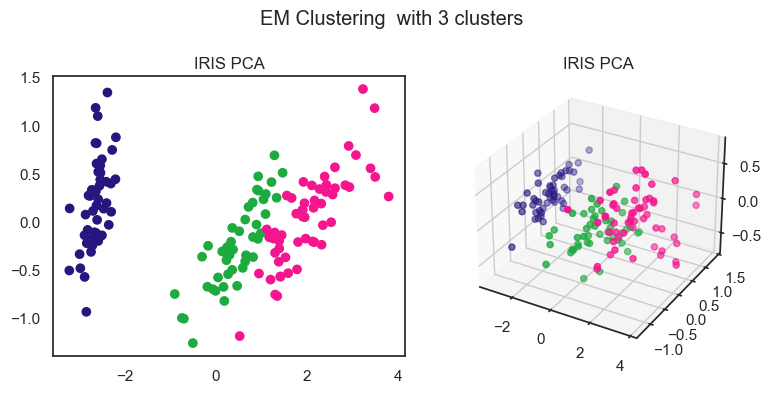

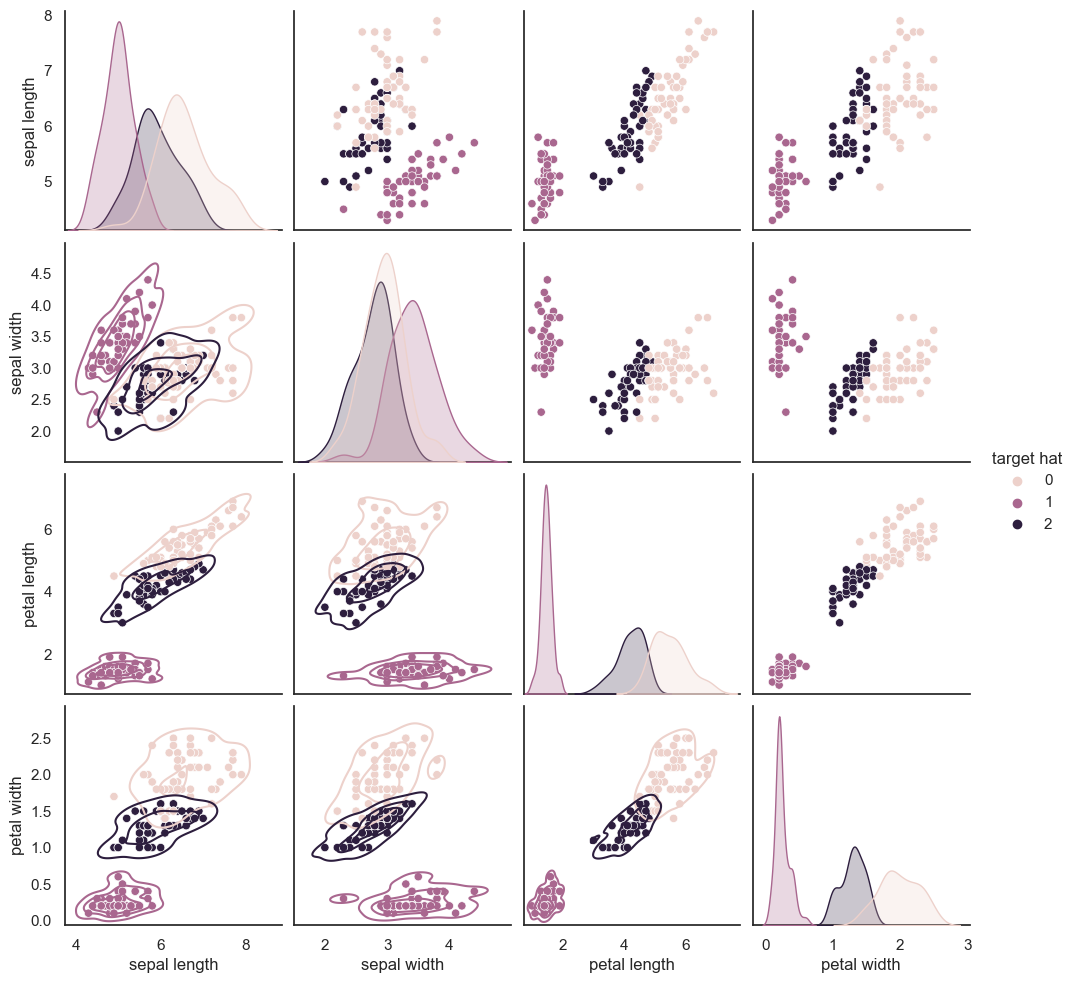

In [28]:
# Clustering Result

fig = plt.figure(figsize = (8,4))

ax = fig.add_subplot(1,2,1)
ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=c(EM_labels))
ax.set_title('IRIS PCA')

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=c(EM_labels))
ax.set_title('IRIS PCA')

fig.suptitle(f'EM Clustering  with {n_clusters} clusters')
fig.tight_layout()
plt.show()

# sns pairplot
# Might take a while to run

dataframe_val = dataframe.drop(columns=['target'])
dataframe_val = dataframe_val.join(pd.DataFrame({'target hat' : EM_labels}))

g = sns.pairplot(dataframe_val, hue='target hat')
g.map_lower(sns.kdeplot, levels=4, color=".5")
plt.show()

# <font color = 'DarkMagenta'> DBSSCAN Clustering

<hr>

Using sklearn DBSCAN algorithm, we can perform dbscan clustering on our dataset. Hyperparameters are set at the beginning of this exercise and different values in hyperparameters can result in different clusters.  

In [29]:
# Create the model

clustering = DBSCAN(eps=eps, min_samples= min_samples)

# Fit the model on dataset

clustering.fit(data)

# Clustering labels

DBSCAN_labels = clustering.labels_

## <font color = 'DarkMagenta'> Visualizing the Results and lables
    
Just like hierarchical clustering, clusters can be acquired using <code>.labels_</code> and then colored using the c function.
There might be a warning that 'No contour levels were found'; You can ignore this.

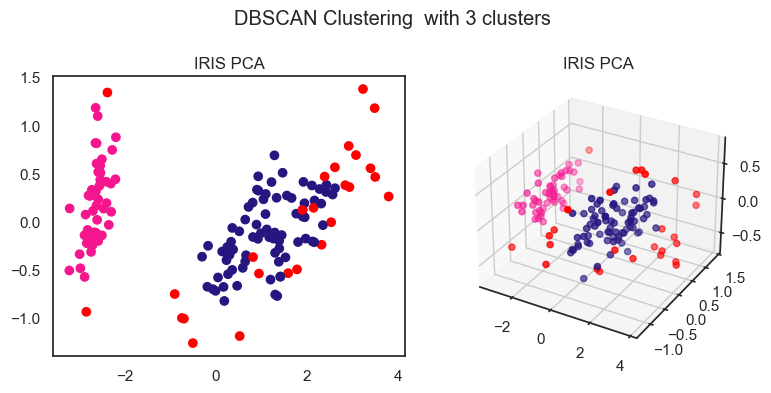

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


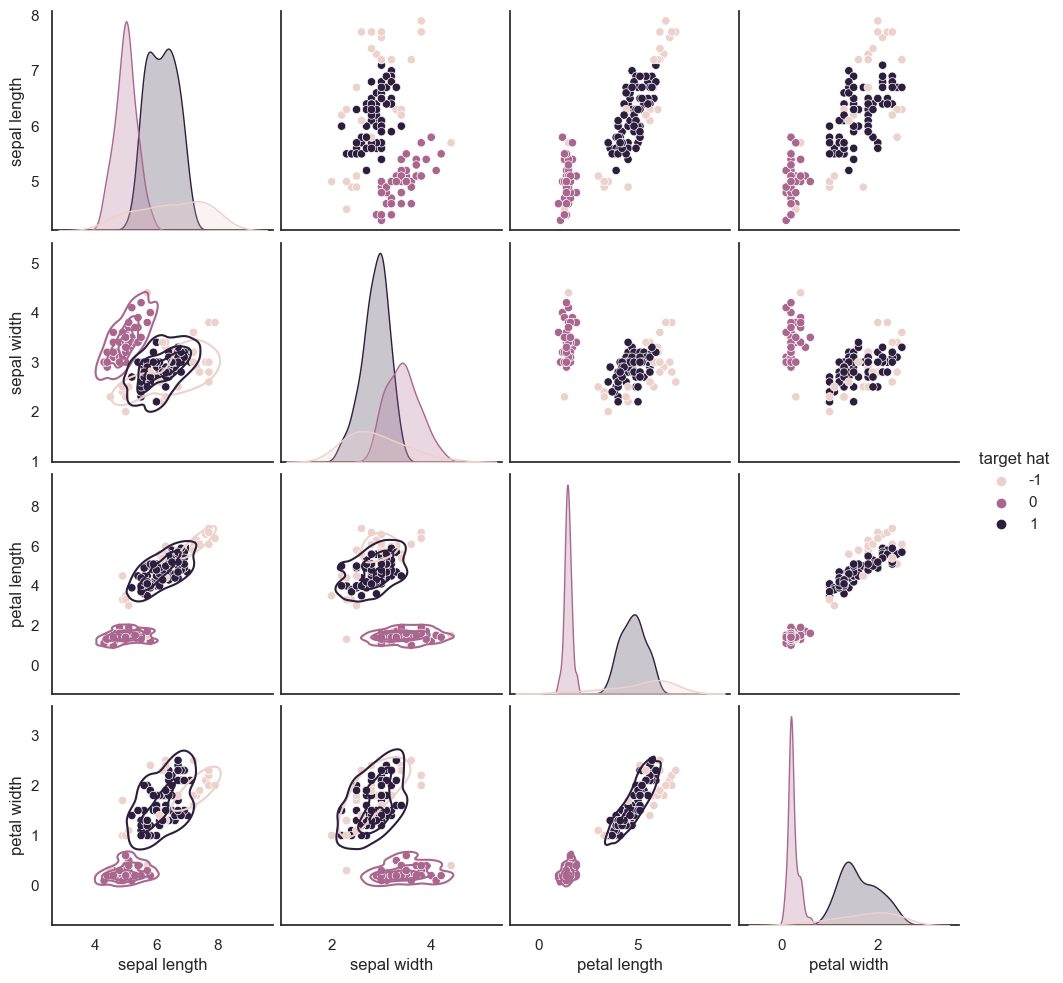

In [40]:
# Clustering Result
# Red samples are noisy the data


fig = plt.figure(figsize = (8,4))

ax = fig.add_subplot(1,2,1)
ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=c(DBSCAN_labels))
ax.set_title('IRIS PCA')

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=c(DBSCAN_labels))
ax.set_title('IRIS PCA')

fig.suptitle(f'DBSCAN Clustering  with {len(np.unique(DBSCAN_labels))} clusters')
fig.tight_layout()
plt.show()

# sns pairplot
# Might take a while to run

dataframe_val = dataframe.drop(columns=['target'])
dataframe_val = dataframe_val.join(pd.DataFrame({'target hat' : DBSCAN_labels}))

g = sns.pairplot(dataframe_val, hue='target hat')
g.map_lower(sns.kdeplot, levels=4, color=".5")
plt.show()

# <font color = 'DarkMagenta'> Kmeans Clustering

<hr>
    
Using sklearn KMeans algorithm, we can perform kmeans clustering on our dataset. 

In [37]:
# Create the model

clustering = KMeans(n_clusters=  n_clusters)

# Fit the model on dataset

clustering.fit(data)

# Clustering labels

Kmeans_labels = clustering.labels_

## <font color = 'DarkMagenta'> Visualizing the Results and lables
    
Just like hierarchical clustering, clusters can be acquired using <code>.labels_</code> and then colored using the c function.  Kmeans centers can also be acquired using <code>.cluster_centers_</code> and then scattered with a square red marker in our plots.    

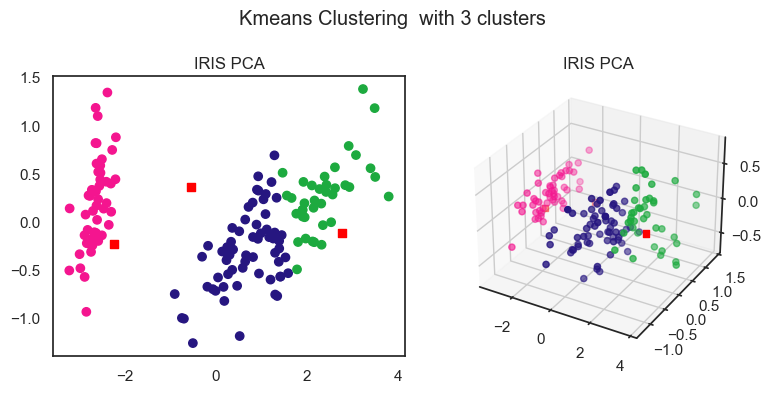

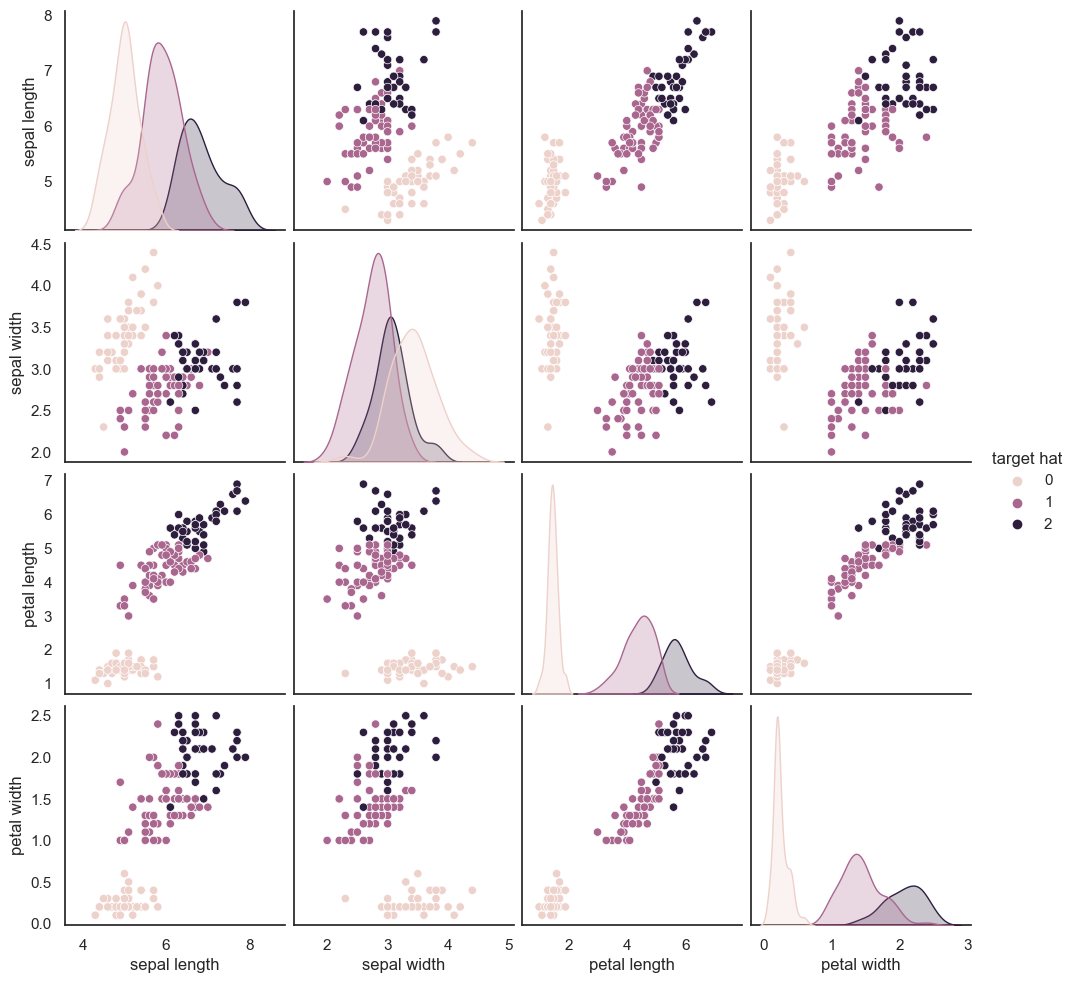

In [38]:
# Clustering Result

fig = plt.figure(figsize = (8,4))

ax = fig.add_subplot(1,2,1)
ax.scatter(X_pca2[:, 0], X_pca2[:, 1], c=c(Kmeans_labels))
centers = PCA(n_components= 2).fit_transform(clustering.cluster_centers_)
ax.scatter(centers[:, 0],centers[:, 1],color = 'red', marker = 's')
ax.set_title('IRIS PCA')

ax = fig.add_subplot(1,2,2, projection = '3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=c(Kmeans_labels))
centers = PCA(n_components= 3).fit_transform(clustering.cluster_centers_)
ax.scatter(centers[:, 0],centers[:, 1], centers[:, 2],color = 'red', marker = 's')
ax.set_title('IRIS PCA')

fig.suptitle(f'Kmeans Clustering  with {n_clusters} clusters')
fig.tight_layout()
plt.show()

# sns pairplot
# Might take a while to run

dataframe_val = dataframe.drop(columns=['target'])
dataframe_val = dataframe_val.join(pd.DataFrame({'target hat' : Kmeans_labels}))

sns.pairplot(dataframe_val, hue='target hat')
plt.show()

# <font color = 'DarkMagenta'> Clustering Validation

<hr>

Since the groud truth is available, we can use it to evaluate our clustering methods. In this excercise we are using 3 different scores (External/Supervised Evaluation). A more complete explanation behind them is available at both book and 
<a href = "https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation">scikit-learn</a>.
    
<hr>

### <font color = 'DarkMagenta'> Rand index : 
    
Given the knowledge of the ground truth class assignments and our clustering algorithm assignments of the same samples, the (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations.
    
Its advantages are : 
    
- Interpretability: The unadjusted Rand index is proportional to the number of sample pairs whose labels are the same in both labels_pred and labels_true, or are different in both.

- Random (uniform) label assignments have an adjusted Rand index score close to 0.0 for any value of n_clusters and n_samples    (which is not the case for the unadjusted Rand index or the V-measure for instance).

- Bounded range: Lower values indicate different labelings, similar clusterings have a high (adjusted or unadjusted) Rand index, 1.0 is the perfect match score. The score range is [0, 1] for the unadjusted Rand index and [-1, 1] for the adjusted Rand index.

- No assumption is made on the cluster structure: The (adjusted or unadjusted) Rand index can be used to compare all kinds of clustering algorithms, and can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.
    
Its drawbacks are :
    
- Contrary to inertia, the (adjusted or unadjusted) Rand index requires knowledge of the ground truth classes which is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

    However (adjusted or unadjusted) Rand index can also be useful in a purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection (TODO).

    
- The unadjusted Rand index is often close to 1.0 even if the clusterings themselves differ significantly. This can be understood when interpreting the Rand index as the accuracy of element pair labeling resulting from the clusterings: In practice there often is a majority of element pairs that are assigned the different pair label under both the predicted and the ground truth clustering resulting in a high proportion of pair labels that agree, which leads subsequently to a high score. 
    
    
**Mathematical formulation** : 
    
If $C$ is a ground truth class assignment and $K$ the clustering, let us define $a$ and $b$ as:
    
- $a$ the number of pairs of elements that are in the same set in $C$ and in the same set in $K$
    
- $b$ the number of pairs of elements that are in different sets in $C$ and in different sets in $K$
    
The unadjusted Rand index is then given by:
    
$$
RI = \frac{a+b}{C_2^{n_{samples}}}
$$
    
where  
    $C_2^{n_{samples}}$
    is the total number of possible pairs in the dataset. It does not matter if the calculation is performed on ordered pairs or unordered pairs as long as the calculation is performed consistently.   

### <font color = 'DarkMagenta'> Mutual Information based scores :
    
Given the knowledge of the ground truth class assignments and our clustering algorithm assignments of the same samples, the Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance.
    
Its advantages are  :
    
- Random (uniform) label assignments have a AMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).

- Upper bound of 1: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, an AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).
    
Its drawbacks are :
    
- Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

    However MI-based measures can also be useful in purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection.

    
- NMI and MI are not adjusted against chance.
    
    
**Mathematical formulation** :
    
    
Assume two label assignments (of the same N objects), $U$ and $V$. Their entropy is the amount of uncertainty for a partition set, defined by:
    
$$
    H(U) = - \sum_{i=1}^{|U|}P(i)\log(P(i))
$$
    
where  
    $P(i) = |U_i| / N$
    is the probability that an object picked at random from $U$ falls into class $U_i$ . Likewise for $V$:
    
$$
H(V) = - \sum_{j=1}^{|V|}P'(j)\log(P'(j))
$$
    
With
    $P'(j) = |V_j| / N$
    . The mutual information (MI) between $U$ and $V$ is calculated by:
    
$$
\text{MI}(U, V) = \sum_{i=1}^{|U|}\sum_{j=1}^{|V|}P(i, j)\log\left(\frac{P(i,j)}{P(i)P'(j)}\right)
$$
    
where  
    $P(i, j) = |U_i \cap V_j| / N$
    is the probability that an object picked at random falls into both classes $U_i$ and $V_i$ .
    
It also can be expressed in set cardinality formulation:
    
$$
\text{MI}(U, V) = \sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i \cap V_j|}{N}\log\left(\frac{N|U_i \cap V_j|}{|U_i||V_j|}\right)
$$
    
The normalized mutual information is defined as
    
$$
\text{NMI}(U, V) = \frac{\text{MI}(U, V)}{\text{mean}(H(U), H(V))}
$$

### <font color = 'DarkMagenta'> Fowlkes-Mallows index

The Fowlkes-Mallows index can be used when the ground truth class assignments of the samples is known. The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall:
    
$$
\text{FMI} = \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) (\text{TP} + \text{FN})}}
$$

Where TP is the number of True Positive (i.e. the number of pair of points that belong to the same clusters in both the true labels and the predicted labels), FP is the number of False Positive (i.e. the number of pair of points that belong to the same clusters in the true labels and not in the predicted labels) and FN is the number of False Negative (i.e the number of pair of points that belongs in the same clusters in the predicted labels and not in the true labels).
    
    
Its advantages are :
    
- Random (uniform) label assignments have a FMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).

- Upper-bounded at 1: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a FMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).

- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.
    
    
Its drawbacks are :
    
- Contrary to inertia, FMI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).
    

## <font color = 'DarkMagenta'> Hierarchical Clustering
    
    
Using The three scores above, we can evaluate our clustering method.

In [41]:
# rand score
Hierarchical_rc = metrics.rand_score(target, Hierarchical_labels)

# Normalized Mutual Information
Hierarchical_nmi = metrics.normalized_mutual_info_score(target, Hierarchical_labels)

# Fowlkes-Mallows scores
Hierarchical_fm  = metrics.fowlkes_mallows_score(target, Hierarchical_labels)


print(f'rand score : {Hierarchical_rc}')
print(f'Normalized Mutual Information score : {Hierarchical_nmi}')
print(f'Fowlkes-Mallows score : {Hierarchical_fm}')

rand score : 0.8797315436241611
Normalized Mutual Information score : 0.7906785790830966
Fowlkes-Mallows score : 0.8237641241035158


## <font color = 'DarkMagenta'> Expected Maximum Clustering
    
Using The three scores above, we can evaluate our clustering method.

In [42]:
# rand score
EM_rc = metrics.rand_score(target, EM_labels)

# Normalized Mutual Information
EM_nmi = metrics.normalized_mutual_info_score(target, EM_labels)

# Fowlkes-Mallows scores
EM_fm  = metrics.fowlkes_mallows_score(target, EM_labels)


print(f'rand score : {EM_rc}')
print(f'Normalized Mutual Information score : {EM_nmi}')
print(f'Fowlkes-Mallows score : {EM_fm}')

rand score : 0.9574944071588367
Normalized Mutual Information score : 0.8996935451597475
Fowlkes-Mallows score : 0.9355985958131776


## <font color = 'DarkMagenta'> DBSCAN Clustering
    
Using The three scores above, we can evaluate our clustering method.

In [43]:
# rand score
DBSCAN_rc = metrics.rand_score(target, DBSCAN_labels)

# Normalized Mutual Information
DBSCAN_nmi = metrics.normalized_mutual_info_score(target, DBSCAN_labels)

# Fowlkes-Mallows scores
DBSCAN_fm  = metrics.fowlkes_mallows_score(target, DBSCAN_labels)


print(f'rand score : {DBSCAN_rc}')
print(f'Normalized Mutual Information score : {DBSCAN_nmi}')
print(f'Fowlkes-Mallows score : {DBSCAN_fm}')

rand score : 0.7762863534675615
Normalized Mutual Information score : 0.5842137354876208
Fowlkes-Mallows score : 0.6887754949218047


## <font color = 'DarkMagenta'> Kmeans Clustering
    
Using The three scores above, we can evaluate our clustering method.

In [44]:
# rand score
Kmeans_rc = metrics.rand_score(target, Kmeans_labels)

# Normalized Mutual Information
Kmeans_nmi = metrics.normalized_mutual_info_score(target, Kmeans_labels)

# Fowlkes-Mallows scores
Kmeans_fm  = metrics.fowlkes_mallows_score(target, Kmeans_labels)


print(f'rand score : {Kmeans_rc}')
print(f'Normalized Mutual Information score : {Kmeans_nmi}')
print(f'Fowlkes-Mallows score : {Kmeans_fm}')

rand score : 0.8797315436241611
Normalized Mutual Information score : 0.7581756800057784
Fowlkes-Mallows score : 0.8208080729114153
